In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=2)  # reduced display precision on numpy arrays

## pick ap lotting style
print(plt.style.available)  # this shows the available styles
plt.style.use('classic')

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


## Provide data points

each training example has four features: [size, bedrooms, floors, age] and the output is price

The input data is represented by a 2d matrix **X_train** where each row $i$ is a training example x<sup>(i)</sup> 
and each column $j$ is a feature x<sup>(i)</sup><sub>j</sub>

$m$ is the number of examples and $n$ is the number of features, so the 
dimensions of the matrix are $m x n$  

ie it has $m$ rows and $n$ columns

In [2]:
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

## shape gives you the (m,n) tuple of number of rows (examples) and columns (features)
print(f"X Shape: {X_train.shape}")
print(X_train)
print(f"y Shape: {y_train.shape}")
print(y_train)

X Shape: (3, 4)
[[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   35]]
y Shape: (3,)
[460 232 178]


## Apply feature scaling

Normalize the features to the range between -1 and 1. You can do this by mean normalization (works only for positive features) or z-score normalization (works for all features).

mean normalization = distance of $x_i$ from the mean $\mu_i$ divided by span of values (xmax-xmin)

 $x_i := \dfrac{x_i - \mu_i}{max - min} $ 


In [24]:
# apply mean normalization 
# NB for zscore normalization it's exactly the same, except you 
# divide by the standard deviation vector sigma rather than by the xspans vector

print(f"using the training data \n {X_train}")

# compute the mean - mu will be a vector containing the mean value for each feature

mu = np.mean(X_train, axis=0)  # axis=0 points vertically down the rows (ie traverses a column)
                               # axis=1 points horizontally along the columns (ie traverses a row)

print(f"the computed mu value is {mu}")

# now compute the span of values

xmax = np.amax(X_train, axis=0)
xmin = np.amin(X_train, axis=0)

xspans = xmax-xmin

print(f"the max and mins are {xmax} and {xmin}")
print(f"the spans are {xspans}")

## mu has shape (n,), ie there is a mu value for each feature (column)
## each value in column j of X will be reduced by the value in column j of mu
##
## similarly xspans has shape (n, ), with a value for each feature
## each value in column j of X will be divided by the value in column j of xspans

X_norm = (X_train-mu)/xspans 

print(f"normalized X is \n{X_norm}")




using the training data 
 [[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   35]]
the computed mu value is [1.46e+03 3.33e+00 1.33e+00 4.00e+01]
the max and mins are [2104    5    2   45] and [852   2   1  35]
the spans are [1252    3    1   10]
normalized X is 
[[ 0.52  0.56 -0.33  0.5 ]
 [-0.03 -0.11  0.67  0.  ]
 [-0.48 -0.44 -0.33 -0.5 ]]


## Parameters w (vector) b (scalar)
The w parameter is now a vector (we need a value for each of the n features)
b is still a scalar

In [3]:
## optimal initialization values for demonstration of prediction

b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])
print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)}")

w_init shape: (4,), b_init type: <class 'float'>


## Model prediction with linear model
The model's price prediction, for a particular input x, is given by the dot product of w and x plus b: 

$$ f_{\mathbf{w},b}(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b  \tag{2} $$ 

In [4]:
## try out a prediction

# get a row from our training data
x_vec = X_train[1,:]
print(f"x_vec shape {x_vec.shape}, x_vec value: {x_vec}")

prediction = np.dot(x_vec, w_init) + b_init

print(f"predicted cost= {prediction}")

x_vec shape (4,), x_vec value: [1416    3    2   40]
predicted cost= 231.99999836940822


## Compute cost with multiple variables
The equation for the cost function with multiple variables $J(\mathbf{w},b)$ is:
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 \tag{3}$$ 
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b  \tag{4} $$ 


In contrast to previous labs, $\mathbf{w}$ and $\mathbf{x}^{(i)}$ are vectors rather than scalars supporting multiple features.


In [5]:
## Compute Cost with multiple variables

def compute_cost(X, y, w, b):
    """
    compute cost
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """
    m = X.shape[0]

    sum = 0.0
    for i in range(m):
      x_vec = X[i,:]
      f_wb_i = np.dot(x_vec, w) + b
      
      sum += (f_wb_i - y[i])**2

    return sum/(2*m)




## call the function to test it
compute_cost(X_train, y_train, w_init, b_init)

1.5578904330213735e-12

## compute gradients (multiple variables)

The gradient of the above cost function J, for any given parameter values (vector w and scalar b),  is given by the partial derivatives with respect to w and b respectively

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{6}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{7}
\end{align}
$$

In [6]:
def compute_gradient(X, y, w, b):
    """
    X (ndarray, (m,n))  : Data, m examples with n features
    y (ndarray, (m,))   : Target values
    w (ndarray, (n,))   : model parameters
    b (scalar)          : model parameter

    returns dj_dw (ndarray, (n,)) and dj_db (scalar)
    
    """
    m,n = X.shape   # m=number of examples  and n=number of features

    
    dj_dw = np.zeros(n)
    dj_db = 0.0

    for i in range(m):
        
        xvec = X[i,:]                      # extract vector corersponding to ith example
        err = np.dot(xvec, w) + b - y[i]   
        dj_dw += err*xvec
        dj_db += err


    dj_dw = dj_dw/m
    dj_db = dj_db/m

    return (dj_dw, dj_db)

# call function to test it
compute_gradient(X_train, y_train, w_init, b_init)

(array([-2.73e-03, -6.27e-06, -2.22e-06, -6.92e-05]), -1.6739251122999121e-06)

## use gradient to update parameters



$$\begin{align*}  \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{5}  \; & \text{for j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline 
\end{align*}$$

where, n is the number of features, parameters $w_j$,  $b$, are updated simultaneously

In [9]:
# With the two partial derivatives we can now implement gradient descent, where we update w and b (simultaneously) as follows:
# w_new = w - alpha * dj_dw
# b_new = b - alpha * dj_db
# where alpha is the learning rate

def update_parameters(X, y, alpha, w, b):
    """
    X is an (m,n) array of training data, y is an (m) vector of output values
    alpha is the learning rate w (n vector) and b (scalar) are the current model parameters 
    that we want to update

    returns a tuple (w_new, b_new), the new values of the model parameters 
    """

    ## get the gradient at w,b
    ## note that dj_dw is an n vector, and dj_db is a scalar
    dj_dw, dj_db = compute_gradient(X, y, w, b)

    w_new = w - alpha*dj_dw
    b_new = b- alpha*dj_db

    return w_new, b_new


## Run gradient descent

[(array([0., 0., 0., 0.]), 0.0), (array([2.41e-01, 5.59e-04, 1.84e-04, 6.03e-03]), 0.000145), (array([1.95e-01, 4.54e-04, 1.34e-04, 4.78e-03]), 0.00011402564683333336), (array([2.04e-01, 4.79e-04, 1.30e-04, 4.94e-03]), 0.00011714368908454539), (array([2.02e-01, 4.78e-04, 1.17e-04, 4.82e-03]), 0.00011365700305146084), (array([2.02e-01, 4.82e-04, 1.06e-04, 4.75e-03]), 0.00011145001540926669), (array([2.02e-01, 4.85e-04, 9.45e-05, 4.68e-03]), 0.00010899524267421966), (array([2.02e-01, 4.88e-04, 8.30e-05, 4.61e-03]), 0.00010658861070525292), (array([2.02e-01, 4.92e-04, 7.15e-05, 4.54e-03]), 0.00010417278852237807), (array([2.02e-01, 4.95e-04, 6.00e-05, 4.46e-03]), 0.00010175888309386386), (array([2.02e-01, 4.98e-04, 4.86e-05, 4.39e-03]), 9.93447426134968e-05), (array([2.02e-01, 5.01e-04, 3.71e-05, 4.32e-03]), 9.693078395377559e-05), (array([2.02e-01, 5.05e-04, 2.56e-05, 4.25e-03]), 9.451692634615903e-05), (array([2.02e-01, 5.08e-04, 1.41e-05, 4.17e-03]), 9.210318543221897e-05), (array([2.0

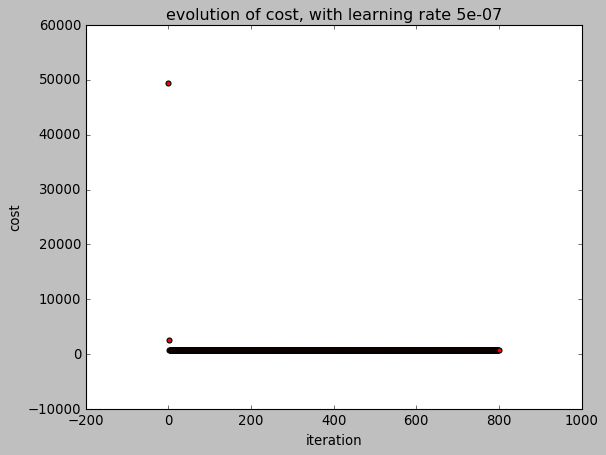

In [27]:

def gradient_descent(X, y, alpha = 5.0e-7):
    """
    X is an (m,n) array of training data, y is an (m) vector of output values

    """
    m,n = X.shape   # m examples, each having n features

    ## set a learning rate alpha and the number of iterations
    iterations = 800

    #initialize both parameters to zero (w is a vector and b is a scalar)
    w = np.zeros(n)
    b = 0. 

    costs = []  # store the history of the cost
    params = []  # store the history of the parameters

    for i in range(iterations):

        params.append( (w, b) )   # store the parameters and their attendant cost
        J = compute_cost(X, y, w, b)
        costs.append(J)


        w, b = update_parameters(X, y, alpha, w, b)

        # if ( np.round(w,1), round(b,1) ) == params[-1]:
        #     print(f"converged at iteration {i} with parameters {w,b}")
        #     break
            

    print(params)
    print(costs)

    print(f"last params are {params[-1]}")
    print(f"with cost {costs[-1]}")    

    ## plot cost J over the iterations
    iterations = [i for i in range(len(costs))]

    # draw a scatter plot of them
    plt.scatter(iterations, costs, marker='o', c='r')
    plt.title(f"evolution of cost, with learning rate {alpha}")
    plt.xlabel("iteration")
    plt.ylabel("cost")

## call the function to test it
gradient_descent(X_train, y_train)

[(array([0., 0., 0., 0.]), 0.0), (array([ 2.40e-05,  2.51e-05, -9.67e-06,  2.35e-05]), 0.000145), (array([ 4.80e-05,  5.02e-05, -1.93e-05,  4.70e-05]), 0.0002899999275), (array([ 7.19e-05,  7.53e-05, -2.90e-05,  7.05e-05]), 0.00043499978250003627), (array([ 9.59e-05,  1.00e-04, -3.87e-05,  9.40e-05]), 0.0005799995650001451), (array([ 1.20e-04,  1.26e-04, -4.83e-05,  1.17e-04]), 0.0007249992750003626), (array([ 1.44e-04,  1.51e-04, -5.80e-05,  1.41e-04]), 0.000869998912500725), (array([ 1.68e-04,  1.76e-04, -6.77e-05,  1.64e-04]), 0.0010149984775012688), (array([ 1.92e-04,  2.01e-04, -7.73e-05,  1.88e-04]), 0.00115999797000203), (array([ 2.16e-04,  2.26e-04, -8.70e-05,  2.11e-04]), 0.0013049973900030448), (array([ 2.40e-04,  2.51e-04, -9.67e-05,  2.35e-04]), 0.00144999673750435), (array([ 0.,  0., -0.,  0.]), 0.0015949960125059813), (array([ 0.,  0., -0.,  0.]), 0.001739995215007975), (array([ 0.,  0., -0.,  0.]), 0.0018849943450103676), (array([ 0.,  0., -0.,  0.]), 0.00202999340251319

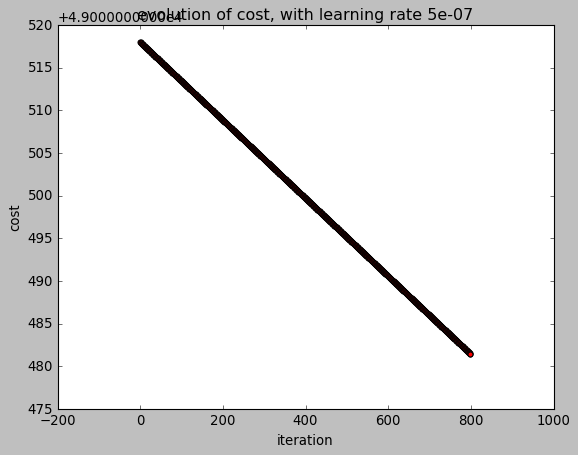

In [25]:
### now try calling gradient descent on the normalized data instead

matrix = X_train

gradient_descent(X_norm, y_train)


## try different values of learning rate

[(array([0., 0., 0., 0.]), 0.0), (array([ 4.8 ,  5.02, -1.93,  4.7 ]), 29.0), (array([ 9.35,  9.79, -3.8 ,  9.16]), 55.1), (array([13.66, 14.32, -5.6 , 13.39]), 78.59), (array([17.76, 18.62, -7.34, 17.4 ]), 99.73100000000001), (array([21.65, 22.7 , -9.02, 21.2 ]), 118.7579), (array([ 25.34,  26.58, -10.65,  24.81]), 135.88211), (array([ 28.83,  30.27, -12.22,  28.23]), 151.293899), (array([ 32.15,  33.76, -13.74,  31.47]), 165.1645091), (array([ 35.3 ,  37.08, -15.21,  34.55]), 177.64805819), (array([ 38.29,  40.24, -16.62,  37.47]), 188.883252371), (array([ 41.13,  43.23, -18.  ,  40.23]), 198.9949271339), (array([ 43.82,  46.08, -19.33,  42.86]), 208.09543442051), (array([ 46.37,  48.78, -20.61,  45.35]), 216.285890978459), (array([ 48.79,  51.35, -21.85,  47.7 ]), 223.65730188061312), (array([ 51.08,  53.78, -23.06,  49.94]), 230.2915716925518), (array([ 53.26,  56.1 , -24.22,  52.06]), 236.26241452329663), (array([ 55.33,  58.3 , -25.35,  54.07]), 241.63617307096698), (array([ 57.2

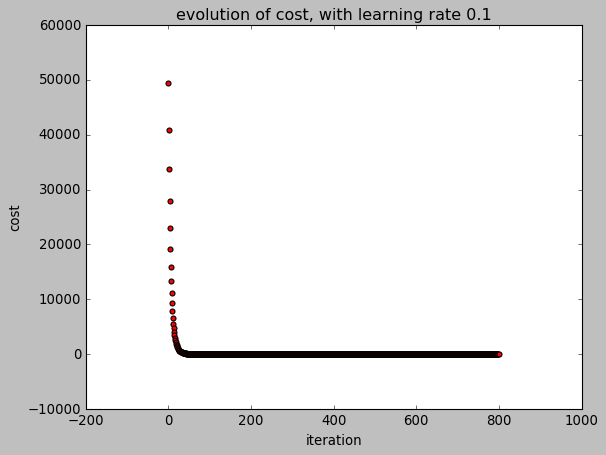

In [31]:
## default value of alpha_init = 5.0e-7 

alphaval = 1.0e-1
gradient_descent(X_norm, y_train, alphaval)